In [155]:
library("tidyverse")
library("DT")
library("ggplot2")
library("dplyr")
library(cluster)
library(pheatmap)
library(tigris)
library(sf)
library(geojsonio)
library(corrplot)
library("ggrepel")
library("ggcorrplot")
library(factoextra )

Warning message:
"package 'factoextra' was built under R version 4.2.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
snapshot_urlfile = "https://raw.githubusercontent.com/ncliu95/smu_dm_project_2/main/texas_snapshot_with_census_pol.csv"

In [3]:
snapshot_cases <- read_csv(url(snapshot_urlfile))

Rows: 254 Columns: 270
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (9): county_name.x, state.x, state.y, state_po, county_name.y, office...
dbl  (250): county_fips_code, state_fips_code, confirmed_cases, deaths, geo_...
lgl   (10): pop_5_years_over, speak_only_english_at_home, speak_spanish_at_h...
date   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
snapshot_cases <- snapshot_cases %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases,
    hispanic_ratio = hispanic_pop/total_pop,
    percent_male_pop = male_pop/total_pop,
    percent_female_pop = female_pop/total_pop,
    white_ratio = white_pop/total_pop,
    black_ratio = black_pop/total_pop,
    asian_ratio = asian_pop/total_pop,
    amerindian_ratio = amerindian_pop/total_pop,
    other_race_ratio = other_race_pop/total_pop,
    percent_unemployed = unemployed_pop/total_pop,
    percent_children = children/total_pop,
    percent_employed_agriculture_forestry_fishing_hunting_mining = employed_agriculture_forestry_fishing_hunting_mining/total_pop,
    percent_employed_arts_entertainment_recreation_accommodation_food = employed_arts_entertainment_recreation_accommodation_food/total_pop,
    percent_employed_construction = employed_construction/total_pop,
    percent_employed_education_health_social = employed_education_health_social/total_pop,
    percent_employed_finance_insurance_real_estate = employed_finance_insurance_real_estate/total_pop,
    percent_employed_information = employed_information/total_pop,
    percent_employed_manufacturing = employed_manufacturing/total_pop,
    percent_employed_other_services_not_public_admin = employed_other_services_not_public_admin/total_pop,
    percent_employed_public_administration = employed_public_administration/total_pop,
    percent_employed_retail_trade = employed_retail_trade/total_pop,
    percent_employed_science_management_admin_waste = employed_science_management_admin_waste/total_pop,
    percent_employed_transportation_warehousing_utilities = employed_transportation_warehousing_utilities/total_pop,
    percent_employed_wholesale_trade = employed_wholesale_trade/total_pop,
    percent_unemployed = unemployed_pop/total_pop,
    percent_children = children/total_pop,
    percent_commute_by_bus = commuters_by_bus/employed_pop,
    percent_commute_by_car_truck_van = commuters_by_car_truck_van/employed_pop,
    percent_commute_by_carpool = commuters_by_carpool/employed_pop,
    percent_commute_by_subway = commuters_by_subway_or_elevated/employed_pop,
    percent_commute_by_driving_alone = commuters_drove_alone/employed_pop,
    percent_wfh = worked_at_home/employed_pop
)

In [5]:
# Download county data for Texas
tx_counties <- counties(state = "TX")
tx_counties$GEOID <- as.numeric(tx_counties$GEOID)
snapshot_cases <- left_join(snapshot_cases, tx_counties[, c("GEOID", "ALAND")], by = c("county_fips_code" = "GEOID"))
snapshot_cases <- snapshot_cases %>% mutate(
  pop_density = total_pop/ALAND)
    

Retrieving data for the year 2021



  |======================================================================| 100%


In [66]:
data <- select(snapshot_cases, 
                  'county_name.x',
'median_income',
'cases_per_1000',
'deaths_per_1000',
'death_per_case',
'hispanic_ratio',
'pop_density',
'party',
'median_age',
'poverty',
'bachelors_degree',   
'commuters_by_public_transportation',
'percent_male_pop',
'percent_female_pop',
'median_age',
'median_rent',
'white_ratio',
'black_ratio',
'asian_ratio',
'amerindian_ratio',
'other_race_ratio',
'percent_employed_agriculture_forestry_fishing_hunting_mining',
'percent_employed_arts_entertainment_recreation_accommodation_food', 
'percent_employed_construction' ,
'percent_employed_education_health_social',
'percent_employed_finance_insurance_real_estate',
'percent_employed_information', 
'percent_employed_manufacturing', 
'percent_employed_other_services_not_public_admin',
'percent_employed_public_administration',
'percent_employed_retail_trade',
'percent_employed_science_management_admin_waste',
'percent_employed_transportation_warehousing_utilities',
'percent_employed_wholesale_trade',
'percent_unemployed',
'percent_children',
 'percent_commute_by_bus',
'percent_commute_by_car_truck_van',
'percent_commute_by_carpool',
'percent_commute_by_subway',
'percent_commute_by_driving_alone',
'percent_wfh'             )

In [67]:
data <- data %>% mutate(party = ifelse(party == "REPUBLICAN", 0, 1))

In [81]:
exclude_cols <- c(
    'cases_per_1000',
'deaths_per_1000',
'death_per_case')
data_temp <- data[, -which(names(data) %in% exclude_cols)]

# Select the numeric columns in the data frame
num_cols <- sapply(data_temp, is.numeric)
# Apply the scale() function to the numeric columns
data_temp[num_cols] <- scale(data_temp[num_cols])

data_updated <- cbind(data_temp, data[, which(names(data) %in% exclude_cols)])
data <- data_updated

In [82]:
data_temp

county_name.x,median_income,hispanic_ratio,pop_density,party,median_age,poverty,bachelors_degree,commuters_by_public_transportation,percent_male_pop,⋯,percent_employed_transportation_warehousing_utilities,percent_employed_wholesale_trade,percent_unemployed,percent_children,percent_commute_by_bus,percent_commute_by_car_truck_van,percent_commute_by_carpool,percent_commute_by_subway,percent_commute_by_driving_alone,percent_wfh
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anderson County,-0.6248695,-0.74179778,-0.17737708,-0.3073341,0.01352820,-0.15445574,-0.19129400,-0.14939225,3.12435487,⋯,-0.4903968,-0.44036892,-0.931714392,-1.24969089,-0.42044051,0.747267770,-0.34070554,-0.2163723,0.85719687,-0.173447797
Andrews County,1.7192137,0.89861041,-0.30410512,-0.3073341,-1.24360478,-0.22971254,-0.24160068,-0.15773407,0.05625169,⋯,1.9295828,-0.58600728,-0.372960144,1.71372507,-0.57048178,1.295324523,1.35716514,-0.2163723,0.02339092,-0.601754841
Angelina County,-0.2820762,-0.55957472,-0.01217613,-0.3073341,-0.37199258,-0.01043969,-0.12826316,-0.13078359,-0.67602576,⋯,-0.7123026,-0.19164483,0.582235235,0.42234799,0.19765808,0.558499116,0.10740619,-0.2163723,0.36881344,-0.767118077
Aransas County,-0.4362878,-0.32198479,-0.04608123,-0.3073341,1.77351438,-0.19463508,-0.21037042,-0.15773407,-0.23773240,⋯,-1.2922404,0.19737166,0.291900350,-1.36958006,-0.57048178,-0.987342389,-0.76867040,-0.2163723,-0.21741474,1.137515530
Archer County,1.0960205,-1.12790518,-0.30998480,-0.3073341,0.96894927,-0.25007359,-0.23257379,-0.15473957,-0.49121596,⋯,0.1828646,1.08270433,-0.899606779,-0.55564376,-0.57048178,0.307564058,-1.07971427,-0.2163723,1.05823069,0.289321679
Armstrong County,1.5541223,-1.05732088,-0.33261415,-0.3073341,1.15332878,-0.25982766,-0.24997857,-0.15773407,-0.12645322,⋯,0.5209242,0.39613360,-1.357519063,-0.70277675,-0.57048178,-1.142701521,1.49007889,-0.2163723,-2.03844619,3.153072625
Atascosa County,0.4368090,1.24890401,-0.22158319,-0.3073341,-0.60665740,-0.15405255,-0.19709559,-0.15452568,-0.28893075,⋯,0.5779085,-0.16874949,0.070377578,0.87810030,-0.40683249,-0.165546568,0.85132664,-0.2163723,-0.77245294,0.788818752
Austin County,1.0483806,-0.36928182,-0.20423544,-0.3073341,0.31524012,-0.20165988,-0.19416530,-0.15602292,-0.45687010,⋯,0.1720953,0.61289849,-0.009467992,-0.05742747,-0.43992092,0.016581578,-0.20038890,-0.2163723,0.16380823,0.251227391
Bailey County,-0.5251388,1.21088490,-0.31340718,-0.3073341,-0.64018095,-0.23828806,-0.24523896,-0.15773407,0.27902030,⋯,1.1210015,0.71731917,-1.293314492,1.15833819,-0.57048178,-3.474000994,-0.79209402,-0.2163723,-2.20100219,1.892646135


In [83]:
summary(data)

 county_name.x      median_income     hispanic_ratio     pop_density     
 Length:254         Min.   :-2.0688   Min.   :-1.3371   Min.   :-0.3386  
 Class :character   1st Qu.:-0.6238   1st Qu.:-0.7166   1st Qu.:-0.3198  
 Mode  :character   Median :-0.1305   Median :-0.3504   Median :-0.2748  
                    Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
                    3rd Qu.: 0.4819   3rd Qu.: 0.6547   3rd Qu.:-0.1504  
                    Max.   : 3.6060   Max.   : 2.7833   Max.   : 8.3510  
     party           median_age          poverty        bachelors_degree 
 Min.   :-0.3073   Min.   :-2.21579   Min.   :-0.2618   Min.   :-0.2546  
 1st Qu.:-0.3073   1st Qu.:-0.69047   1st Qu.:-0.2452   1st Qu.:-0.2457  
 Median :-0.3073   Median :-0.07866   Median :-0.2195   Median :-0.2293  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:-0.3073   3rd Qu.: 0.65048   3rd Qu.:-0.1449   3rd Qu.:-0.1731  
 Max.   : 3.2410   Max.   : 3.09769   

In [120]:
# Socioeconomic Indicators:
se_data <- subset(data, select = c(county_name.x, cases_per_1000, deaths_per_1000, death_per_case, median_income, poverty, median_rent, percent_employed_agriculture_forestry_fishing_hunting_mining, percent_employed_arts_entertainment_recreation_accommodation_food, percent_employed_construction, percent_employed_education_health_social, percent_employed_finance_insurance_real_estate, percent_employed_information, percent_employed_manufacturing, percent_employed_other_services_not_public_admin, percent_employed_public_administration, percent_employed_retail_trade, percent_employed_science_management_admin_waste, percent_employed_transportation_warehousing_utilities, percent_employed_wholesale_trade, percent_unemployed))
write.csv(se_data, "socioeconomic_feature_set.csv")
colnames(se_data)

[1] "county_name.x"                                                    
 [2] "cases_per_1000"                                                   
 [3] "deaths_per_1000"                                                  
 [4] "death_per_case"                                                   
 [5] "median_income"                                                    
 [6] "poverty"                                                          
 [7] "median_rent"                                                      
 [8] "percent_employed_agriculture_forestry_fishing_hunting_mining"     
 [9] "percent_employed_arts_entertainment_recreation_accommodation_food"
[10] "percent_employed_construction"                                    
[11] "percent_employed_education_health_social"                         
[12] "percent_employed_finance_insurance_real_estate"                   
[13] "percent_employed_information"                                     
[14] "percent_employed_manufacturing"                                   
[15] "percent_employed_other_services_not_public_admin"                 
[16] "percent_employed_public_administration"                           
[17] "percent_employed_retail_trade"                                    
[18] "percent_employed_science_management_admin_waste"                  
[19] "percent_employed_transportation_warehousing_utilities"            
[20] "percent_employed_wholesale_trade"                                 
[21] "percent_unemployed"

In [312]:
#  Demographic Indicators
demo_data <- subset(data, select = c(    
    county_name.x,
    cases_per_1000,
    deaths_per_1000,
    death_per_case,
    hispanic_ratio,
    median_age,
    bachelors_degree,
    percent_male_pop,
    percent_female_pop,
    white_ratio,
    black_ratio,
    asian_ratio,
    amerindian_ratio,
    other_race_ratio,
    percent_children))
write.csv(demo_data, "demographic_feature_set.csv")
colnames(demo_data)

[1] "county_name.x"      "cases_per_1000"     "deaths_per_1000"   
 [4] "death_per_case"     "hispanic_ratio"     "median_age"        
 [7] "bachelors_degree"   "percent_male_pop"   "percent_female_pop"
[10] "white_ratio"        "black_ratio"        "asian_ratio"       
[13] "amerindian_ratio"   "other_race_ratio"   "percent_children"

In [122]:
#  Transportation Metrics
transport_data <- subset(data, select = c(
county_name.x,
    cases_per_1000,
    deaths_per_1000,
    death_per_case,
    pop_density,
    commuters_by_public_transportation,
    percent_commute_by_bus,
    percent_commute_by_car_truck_van,
    percent_commute_by_carpool,
    percent_commute_by_subway,
    percent_commute_by_driving_alone,
    percent_wfh)
)
write.csv(transport_data, "transportation_feature_set.csv")
colnames(transport_data)

[1] "county_name.x"                      "cases_per_1000"                    
 [3] "deaths_per_1000"                    "death_per_case"                    
 [5] "pop_density"                        "commuters_by_public_transportation"
 [7] "percent_commute_by_bus"             "percent_commute_by_car_truck_van"  
 [9] "percent_commute_by_carpool"         "percent_commute_by_subway"         
[11] "percent_commute_by_driving_alone"   "percent_wfh"

In [123]:
#  Employment and Industry Indicators
emp_data <- subset(data, select = c(
    county_name.x,
    cases_per_1000,
    deaths_per_1000,
    death_per_case,
    percent_employed_agriculture_forestry_fishing_hunting_mining,
    percent_employed_arts_entertainment_recreation_accommodation_food,
    percent_employed_construction,
    percent_employed_education_health_social,
    percent_employed_finance_insurance_real_estate,
    percent_employed_information,
    percent_employed_manufacturing,
    percent_employed_other_services_not_public_admin,
    percent_employed_public_administration,
    percent_employed_retail_trade,
    percent_employed_science_management_admin_waste,
    percent_employed_transportation_warehousing_utilities,
    percent_employed_wholesale_trade,
    percent_unemployed)
)
write.csv(emp_data, "employment_and_industry_feature_set.csv")
colnames(emp_data)

[1] "county_name.x"                                                    
 [2] "cases_per_1000"                                                   
 [3] "deaths_per_1000"                                                  
 [4] "death_per_case"                                                   
 [5] "percent_employed_agriculture_forestry_fishing_hunting_mining"     
 [6] "percent_employed_arts_entertainment_recreation_accommodation_food"
 [7] "percent_employed_construction"                                    
 [8] "percent_employed_education_health_social"                         
 [9] "percent_employed_finance_insurance_real_estate"                   
[10] "percent_employed_information"                                     
[11] "percent_employed_manufacturing"                                   
[12] "percent_employed_other_services_not_public_admin"                 
[13] "percent_employed_public_administration"                           
[14] "percent_employed_retail_trade"                                    
[15] "percent_employed_science_management_admin_waste"                  
[16] "percent_employed_transportation_warehousing_utilities"            
[17] "percent_employed_wholesale_trade"                                 
[18] "percent_unemployed"

#  Socioeconomic Indicators Dataset

### K - means Clustering

In [124]:
county_names <- se_data$county_name.x
se_data_prepped <- se_data[, !(colnames(se_data) %in% c("county_name.x", "cases_per_1000", "deaths_per_1000", "death_per_case"))]

In [131]:
set.seed(123)
km <- kmeans(se_data_prepped, centers = 4)
km

K-means clustering with 4 clusters of sizes 54, 74, 101, 25

Cluster means:
  median_income     poverty median_rent
1    0.22214989 -0.22374597  -0.3441248
2   -0.75957607 -0.18754072  -0.6629317
3    0.07236232 -0.09898131   0.1667856
4    1.47615762  1.43829631   2.0317736
  percent_employed_agriculture_forestry_fishing_hunting_mining
1                                                   1.38320347
2                                                  -0.08313192
3                                                  -0.45772614
4                                                  -0.89243539
  percent_employed_arts_entertainment_recreation_accommodation_food
1                                                        -0.4794679
2                                                        -0.1867445
3                                                         0.1619325
4                                                         0.9342070
  percent_employed_construction percent_employed_education_health_soc

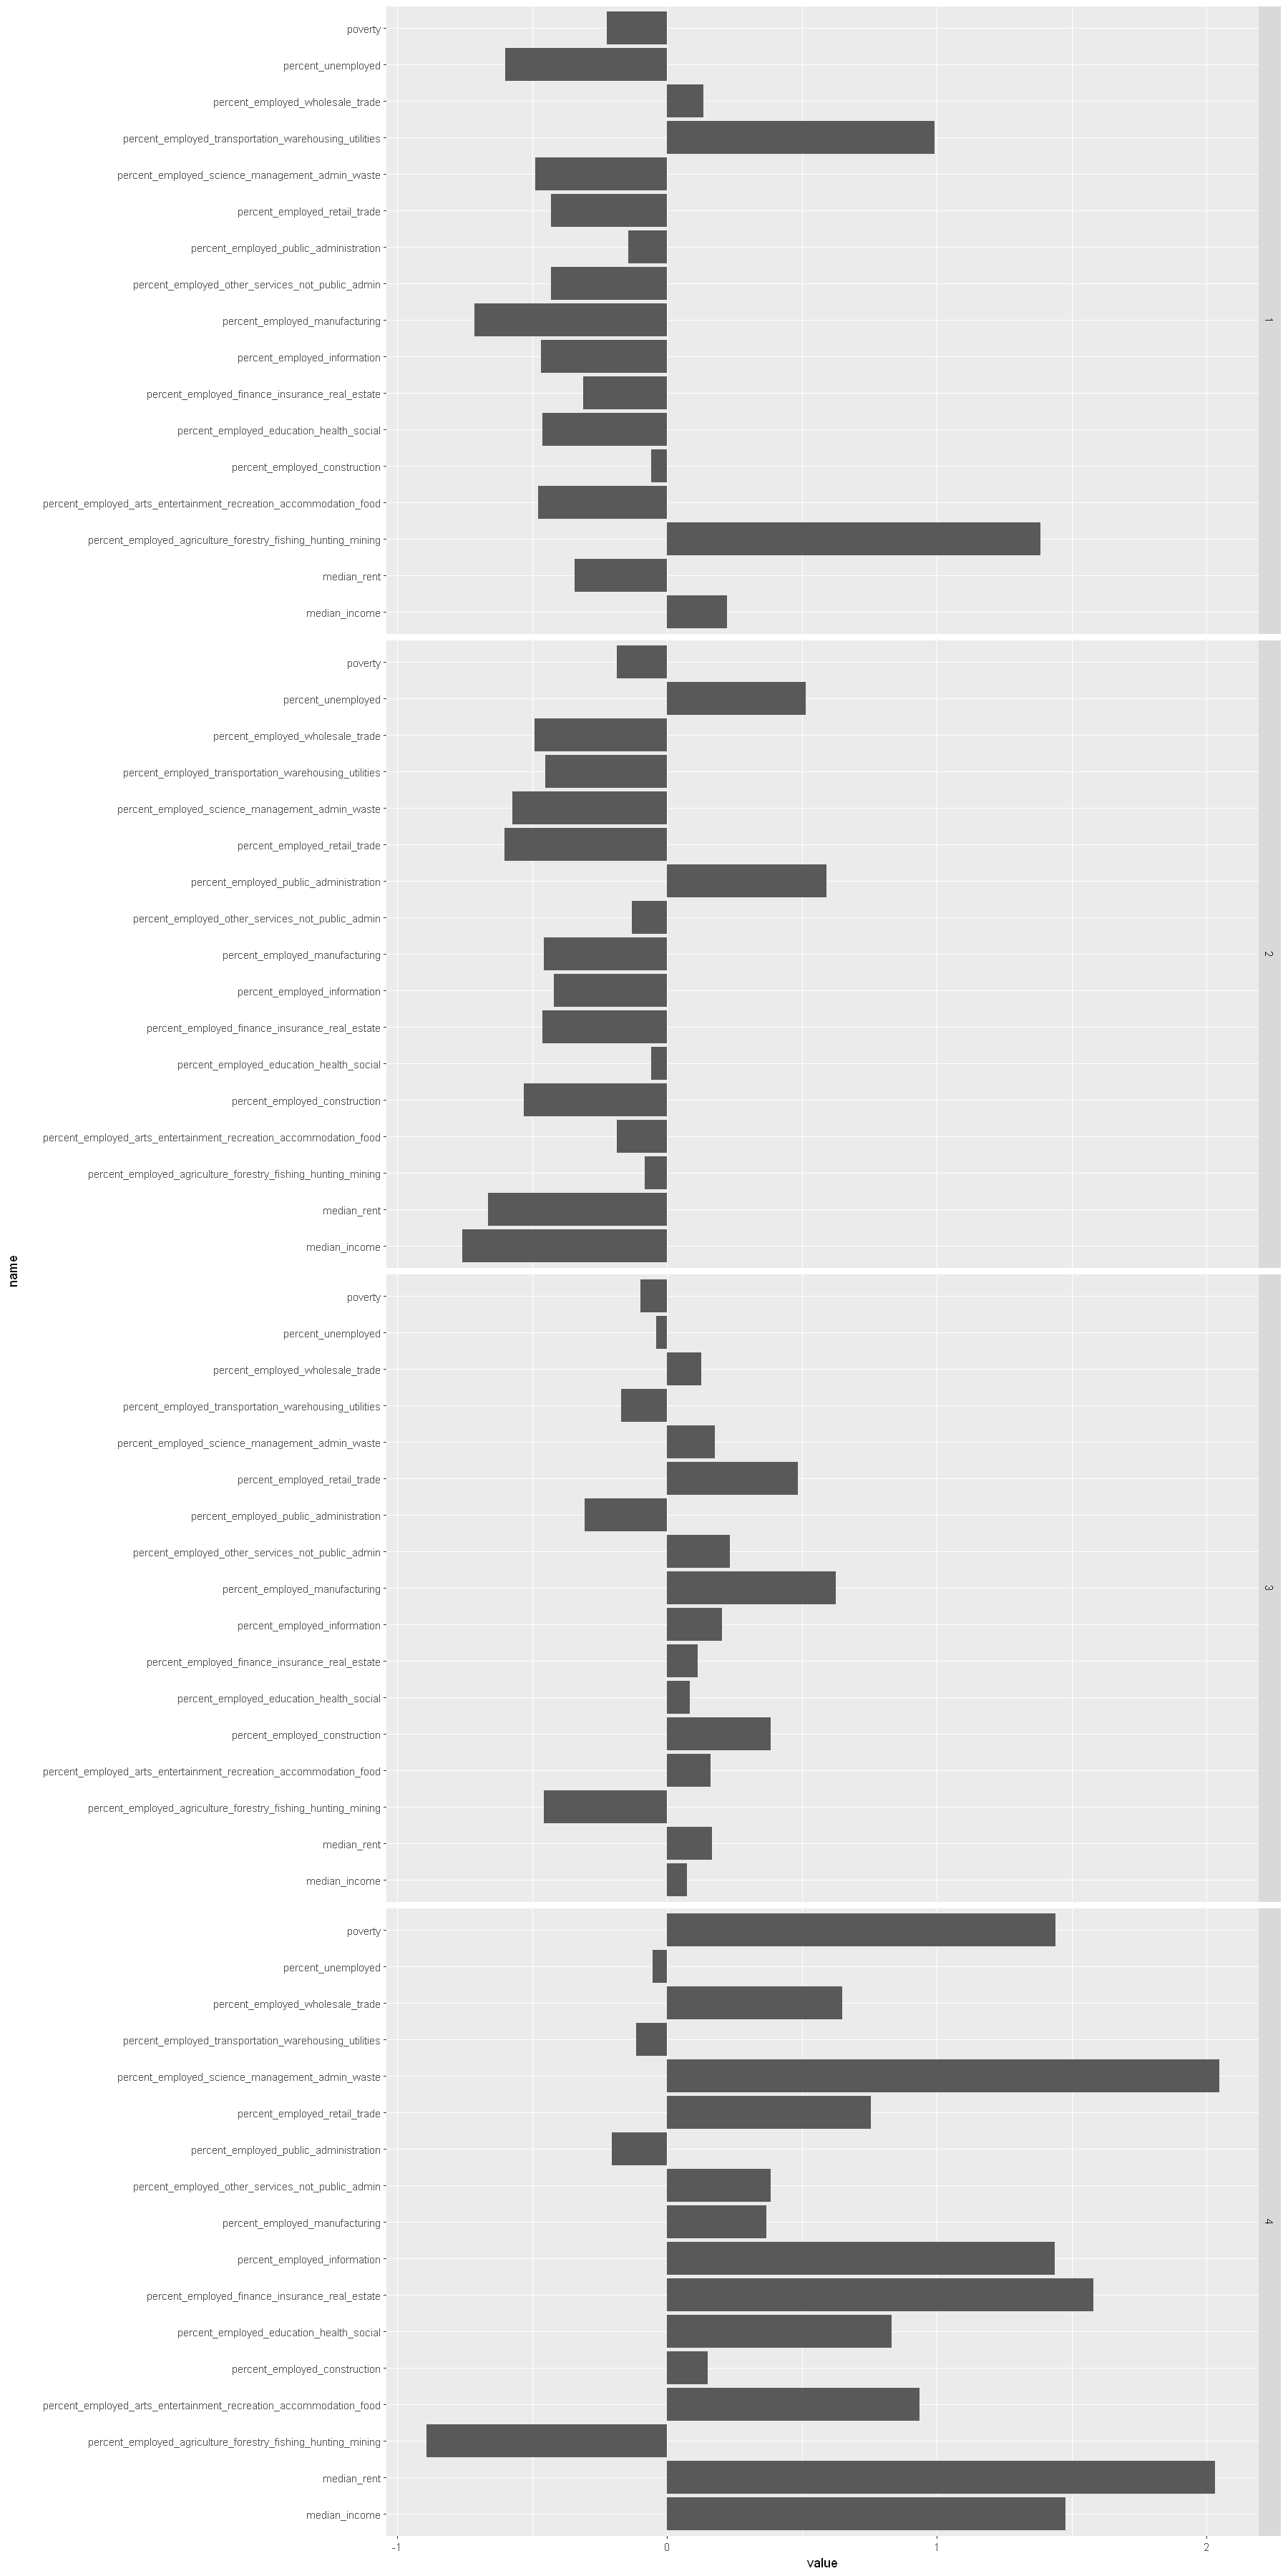

In [132]:
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(pivot_longer(as_tibble(km$centers,  rownames = "cluster"), 
  cols = colnames(km$centers)), 
  aes(y = name, x = value)) +
  geom_bar(stat = "identity") +
  facet_grid(rows = vars(cluster))

In [133]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% 
  rename(c(county = subregion))

In [134]:
se_data <- se_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_clust <- counties_TX %>% left_join(se_data %>% 
    add_column(cluster = factor(km$cluster)))

Joining, by = "county"


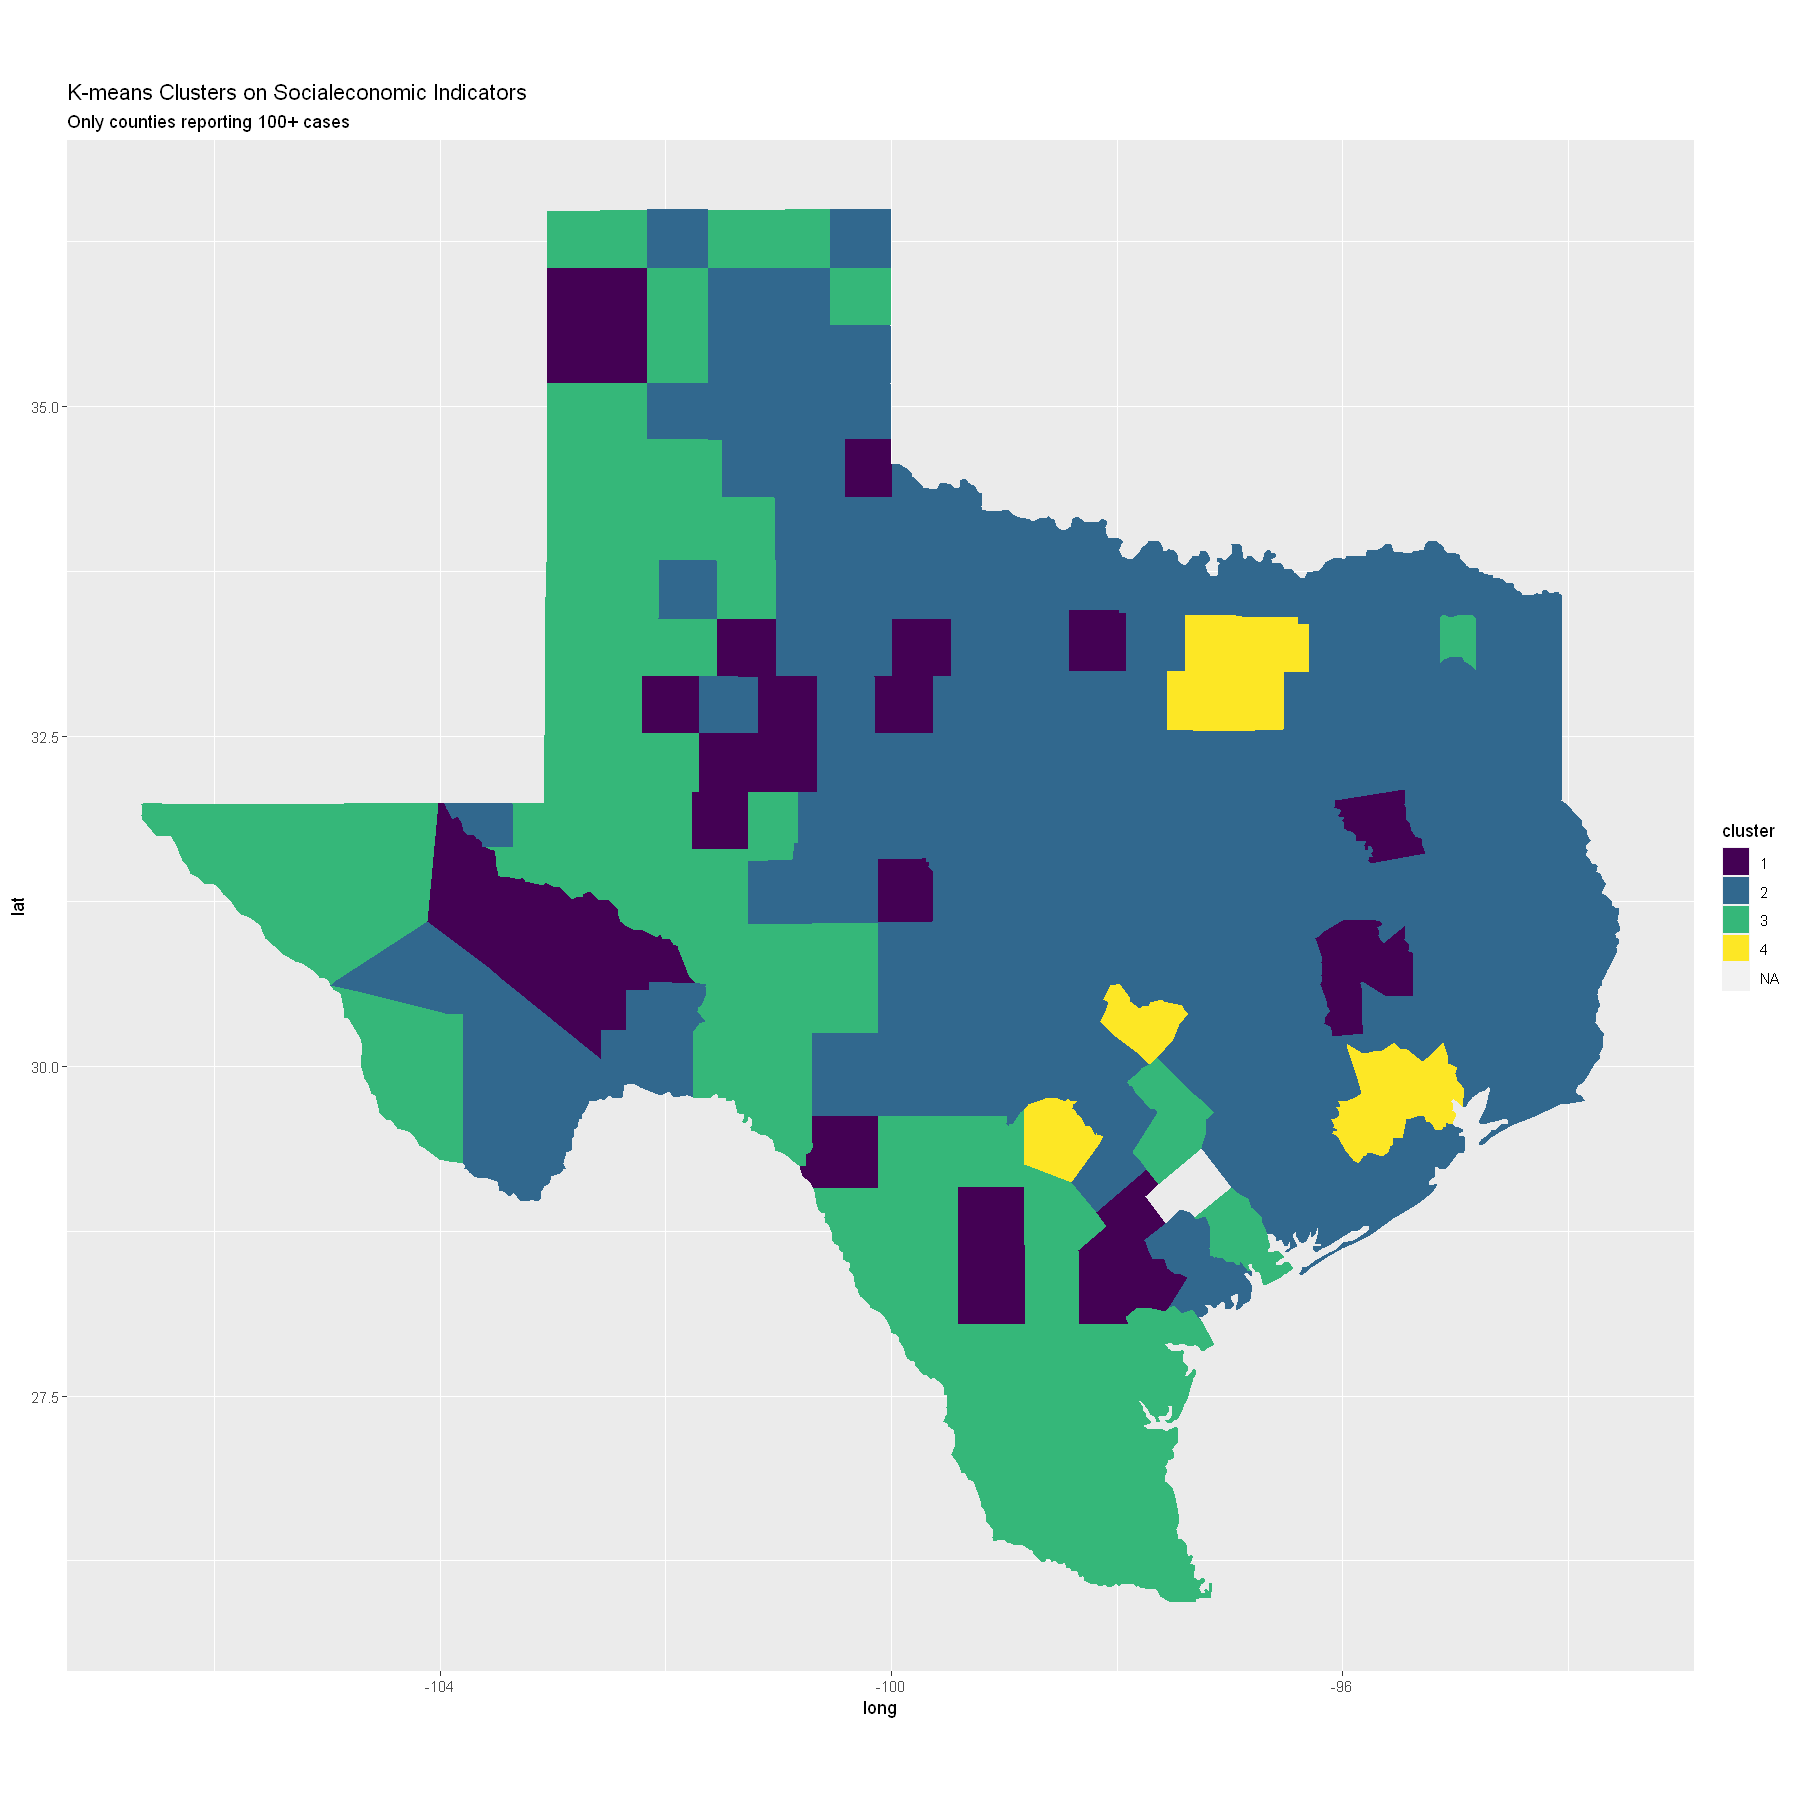

In [320]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "K-means Clusters on Socialeconomic Indicators", subtitle = "Only counties reporting 100+ cases")

In [136]:
se_data_km <- se_data %>% add_column(cluster = factor(km$cluster))

se_data_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,82.28162,2.210219,0.02739127
2,81.40534,2.148647,0.02838551
3,72.35499,1.654035,0.02352106
4,81.36782,1.032447,0.01267792


#### Observations

We see a substaintial drop of deaths per cases in areas in cluster 4.
Areas of cluster 1 also has less average cases than other clusters

### Hierarchical Clustering

In [139]:
county_names <- se_data$county_name.x
summary(se_data_prepped)

 median_income        poverty         median_rent     
 Min.   :-2.0688   Min.   :-0.2618   Min.   :-2.2777  
 1st Qu.:-0.6238   1st Qu.:-0.2452   1st Qu.:-0.6760  
 Median :-0.1305   Median :-0.2195   Median :-0.1189  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4819   3rd Qu.:-0.1449   3rd Qu.: 0.4936  
 Max.   : 3.6060   Max.   :11.3992   Max.   : 3.5403  
 percent_employed_agriculture_forestry_fishing_hunting_mining
 Min.   :-1.1518                                             
 1st Qu.:-0.7294                                             
 Median :-0.2940                                             
 Mean   : 0.0000                                             
 3rd Qu.: 0.4591                                             
 Max.   : 5.1237                                             
 percent_employed_arts_entertainment_recreation_accommodation_food
 Min.   :-2.27150                                                 
 1st Qu.:-0.67314                              

In [150]:
dist_se_prepped <- dist(se_data_prepped)
hc <- hclust(dist_se_prepped, method="complete")

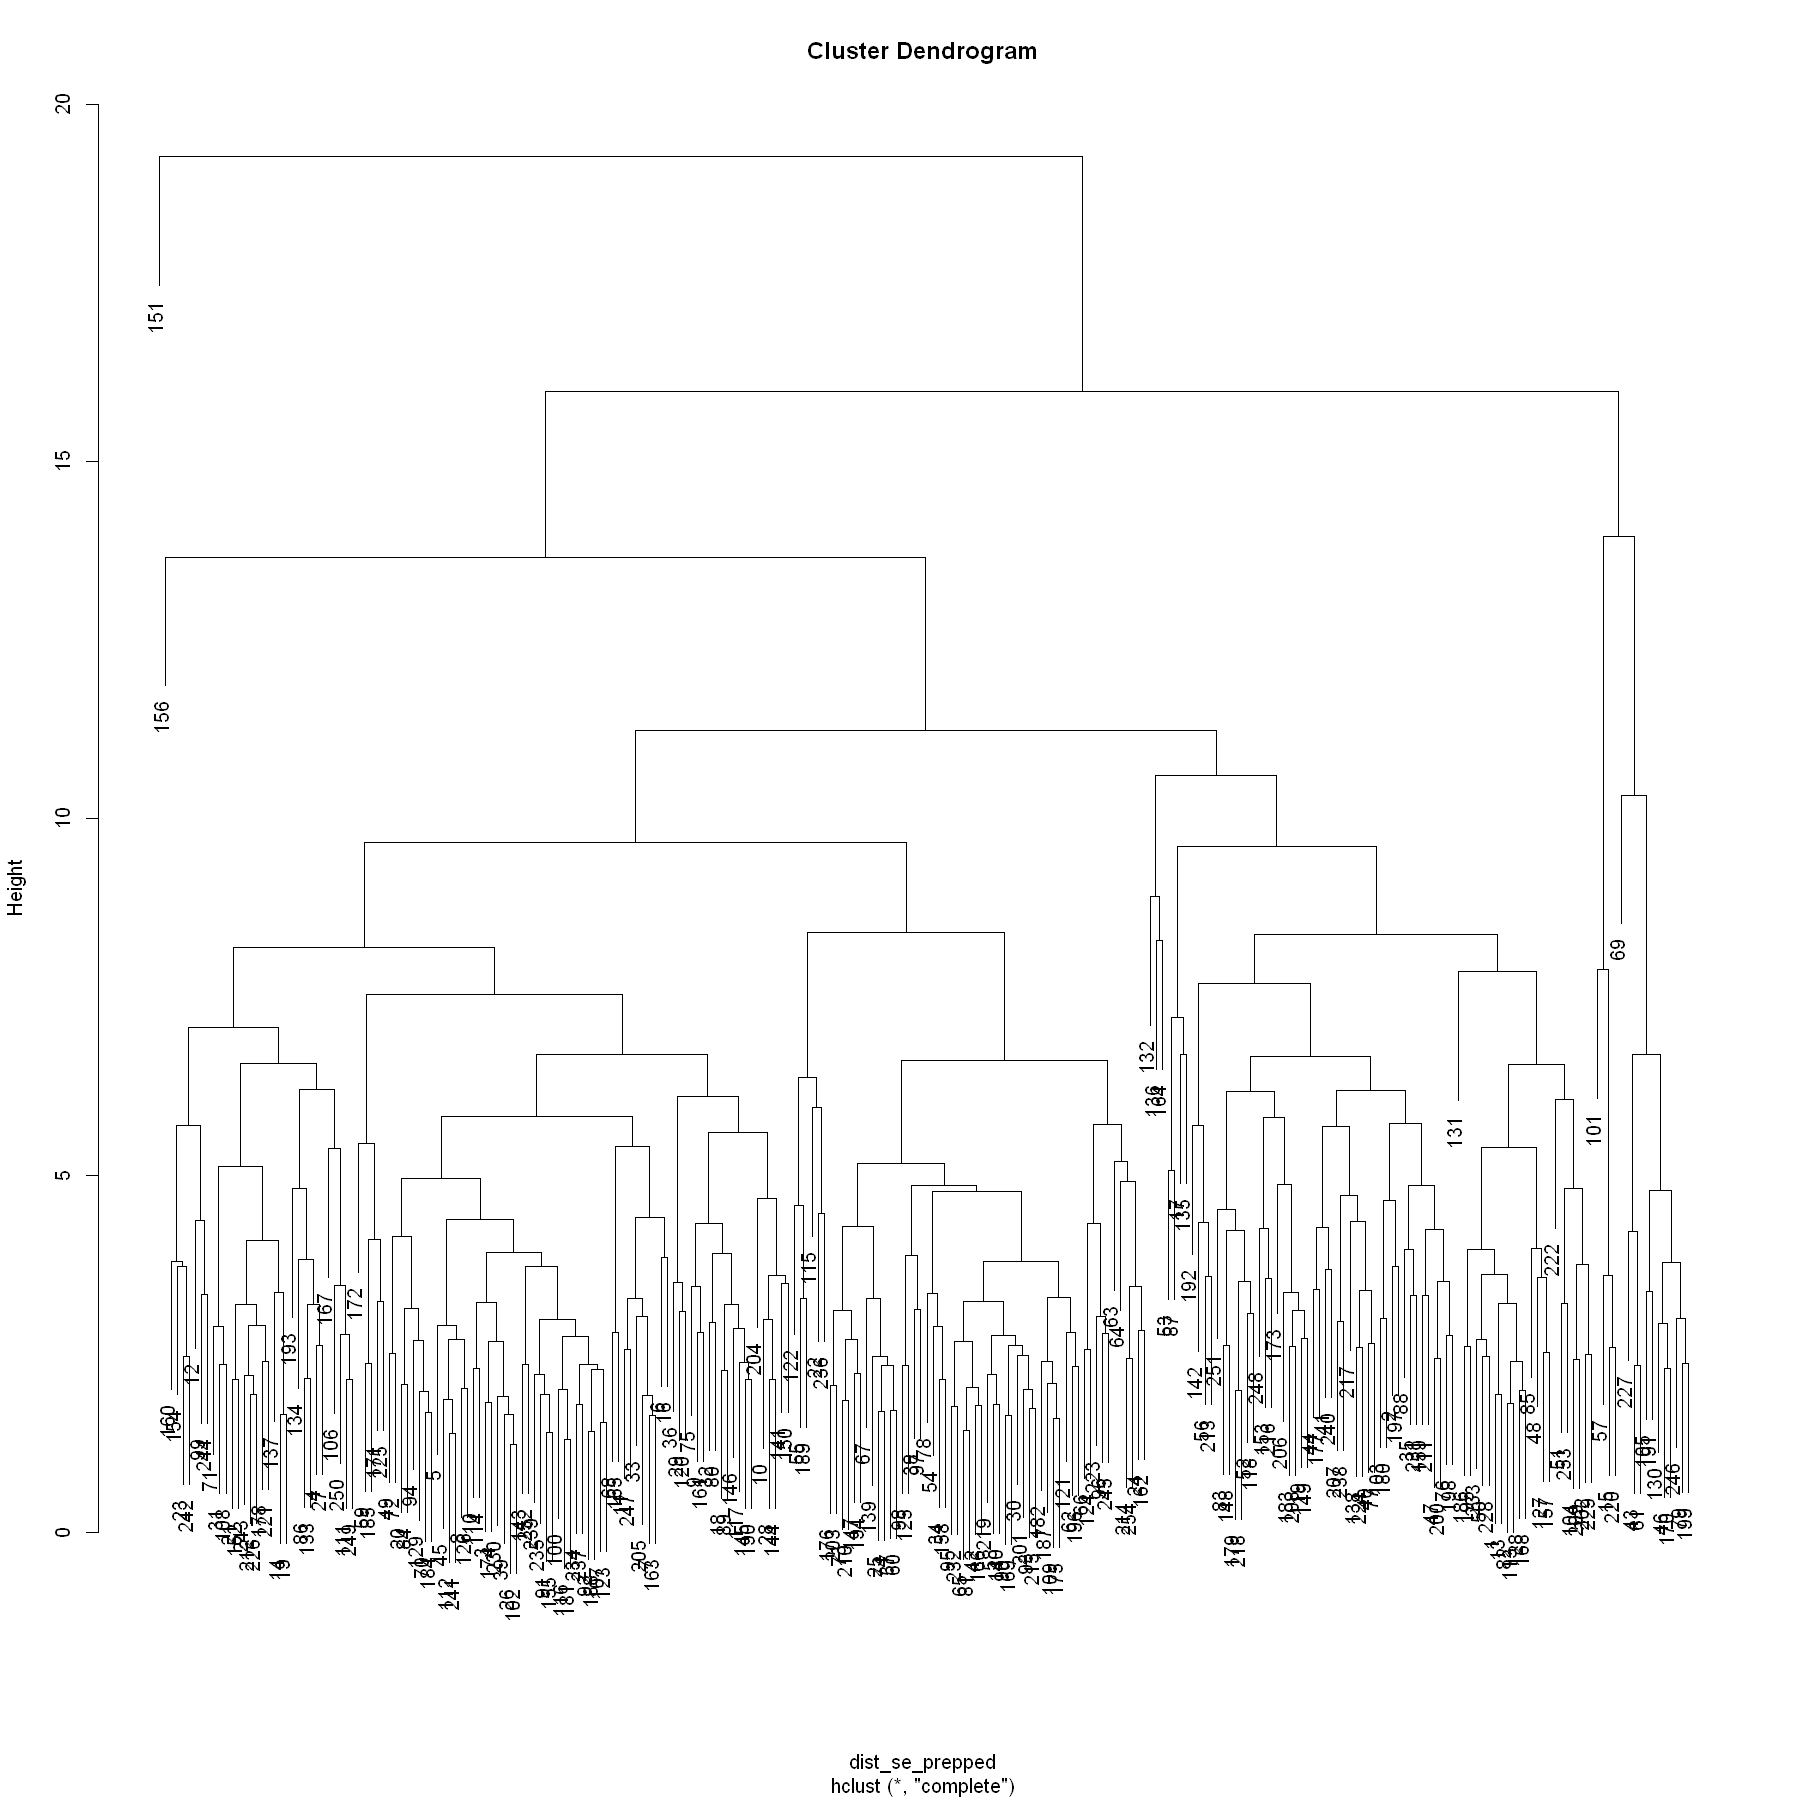

In [151]:
plot(hc)

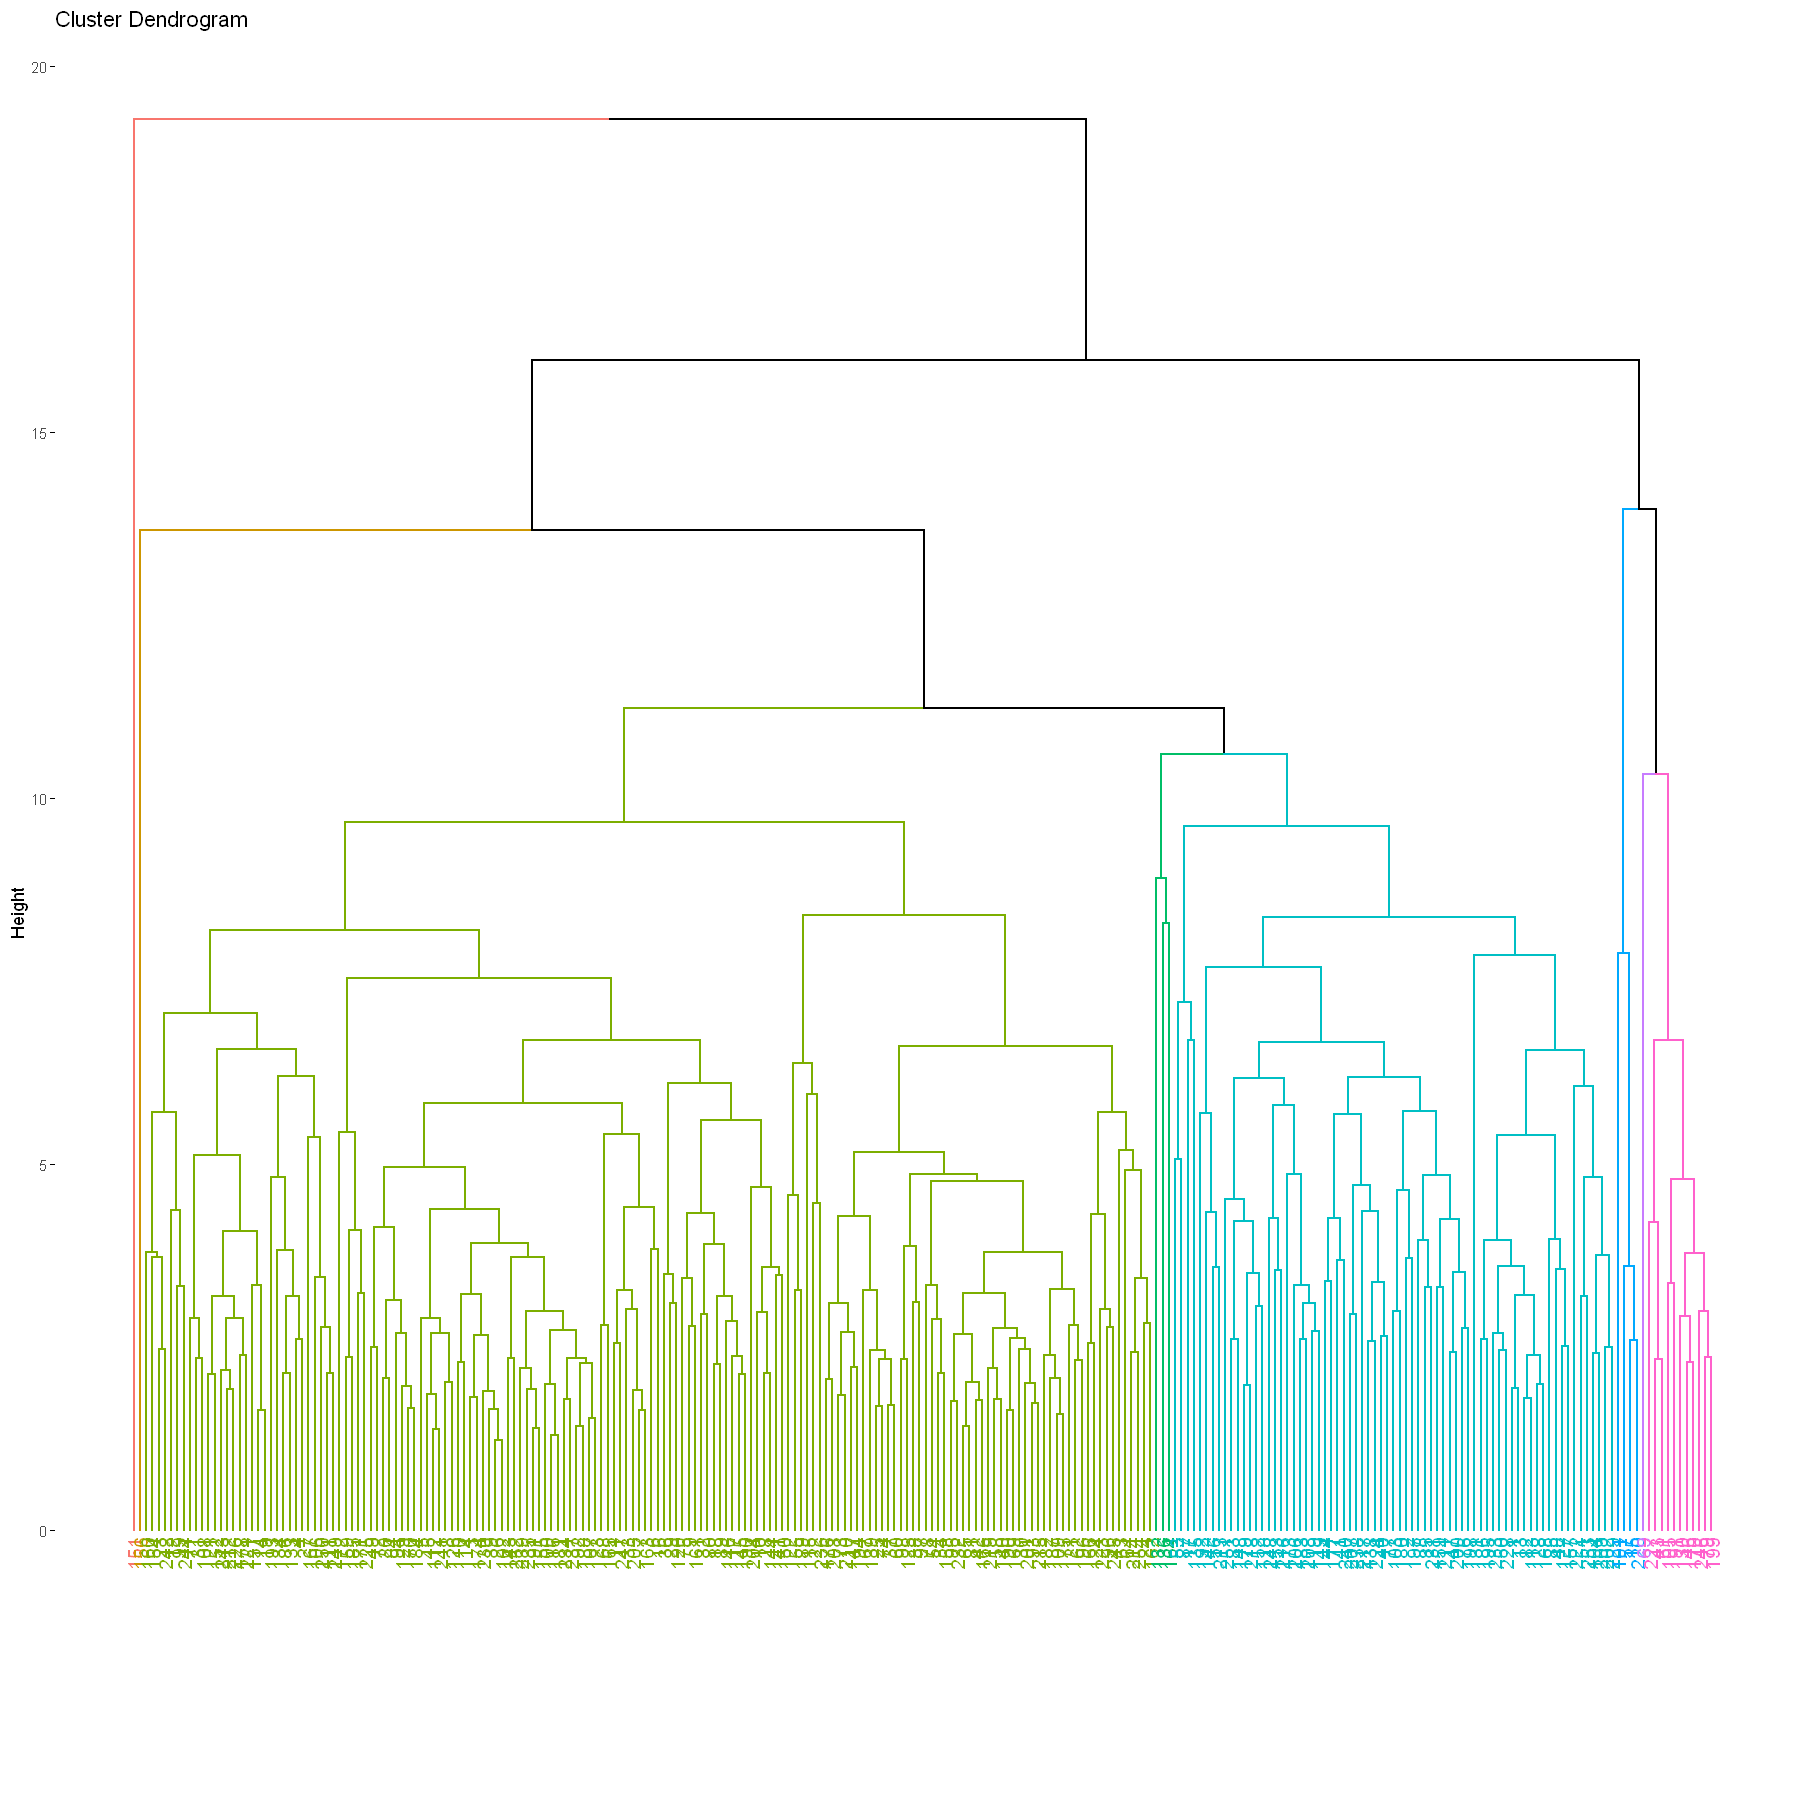

In [187]:
fviz_dend(hc, k=8)

In [191]:
h_clusters <- cutree(hc, k=8)
se_data_hclust <- se_data_prepped %>% add_column(cluster = factor(h_clusters))

In [192]:
se_data <- se_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_hclust <- counties_TX %>% left_join(se_data %>% 
    add_column(cluster = se_data_hclust$cluster))

Joining, by = "county"


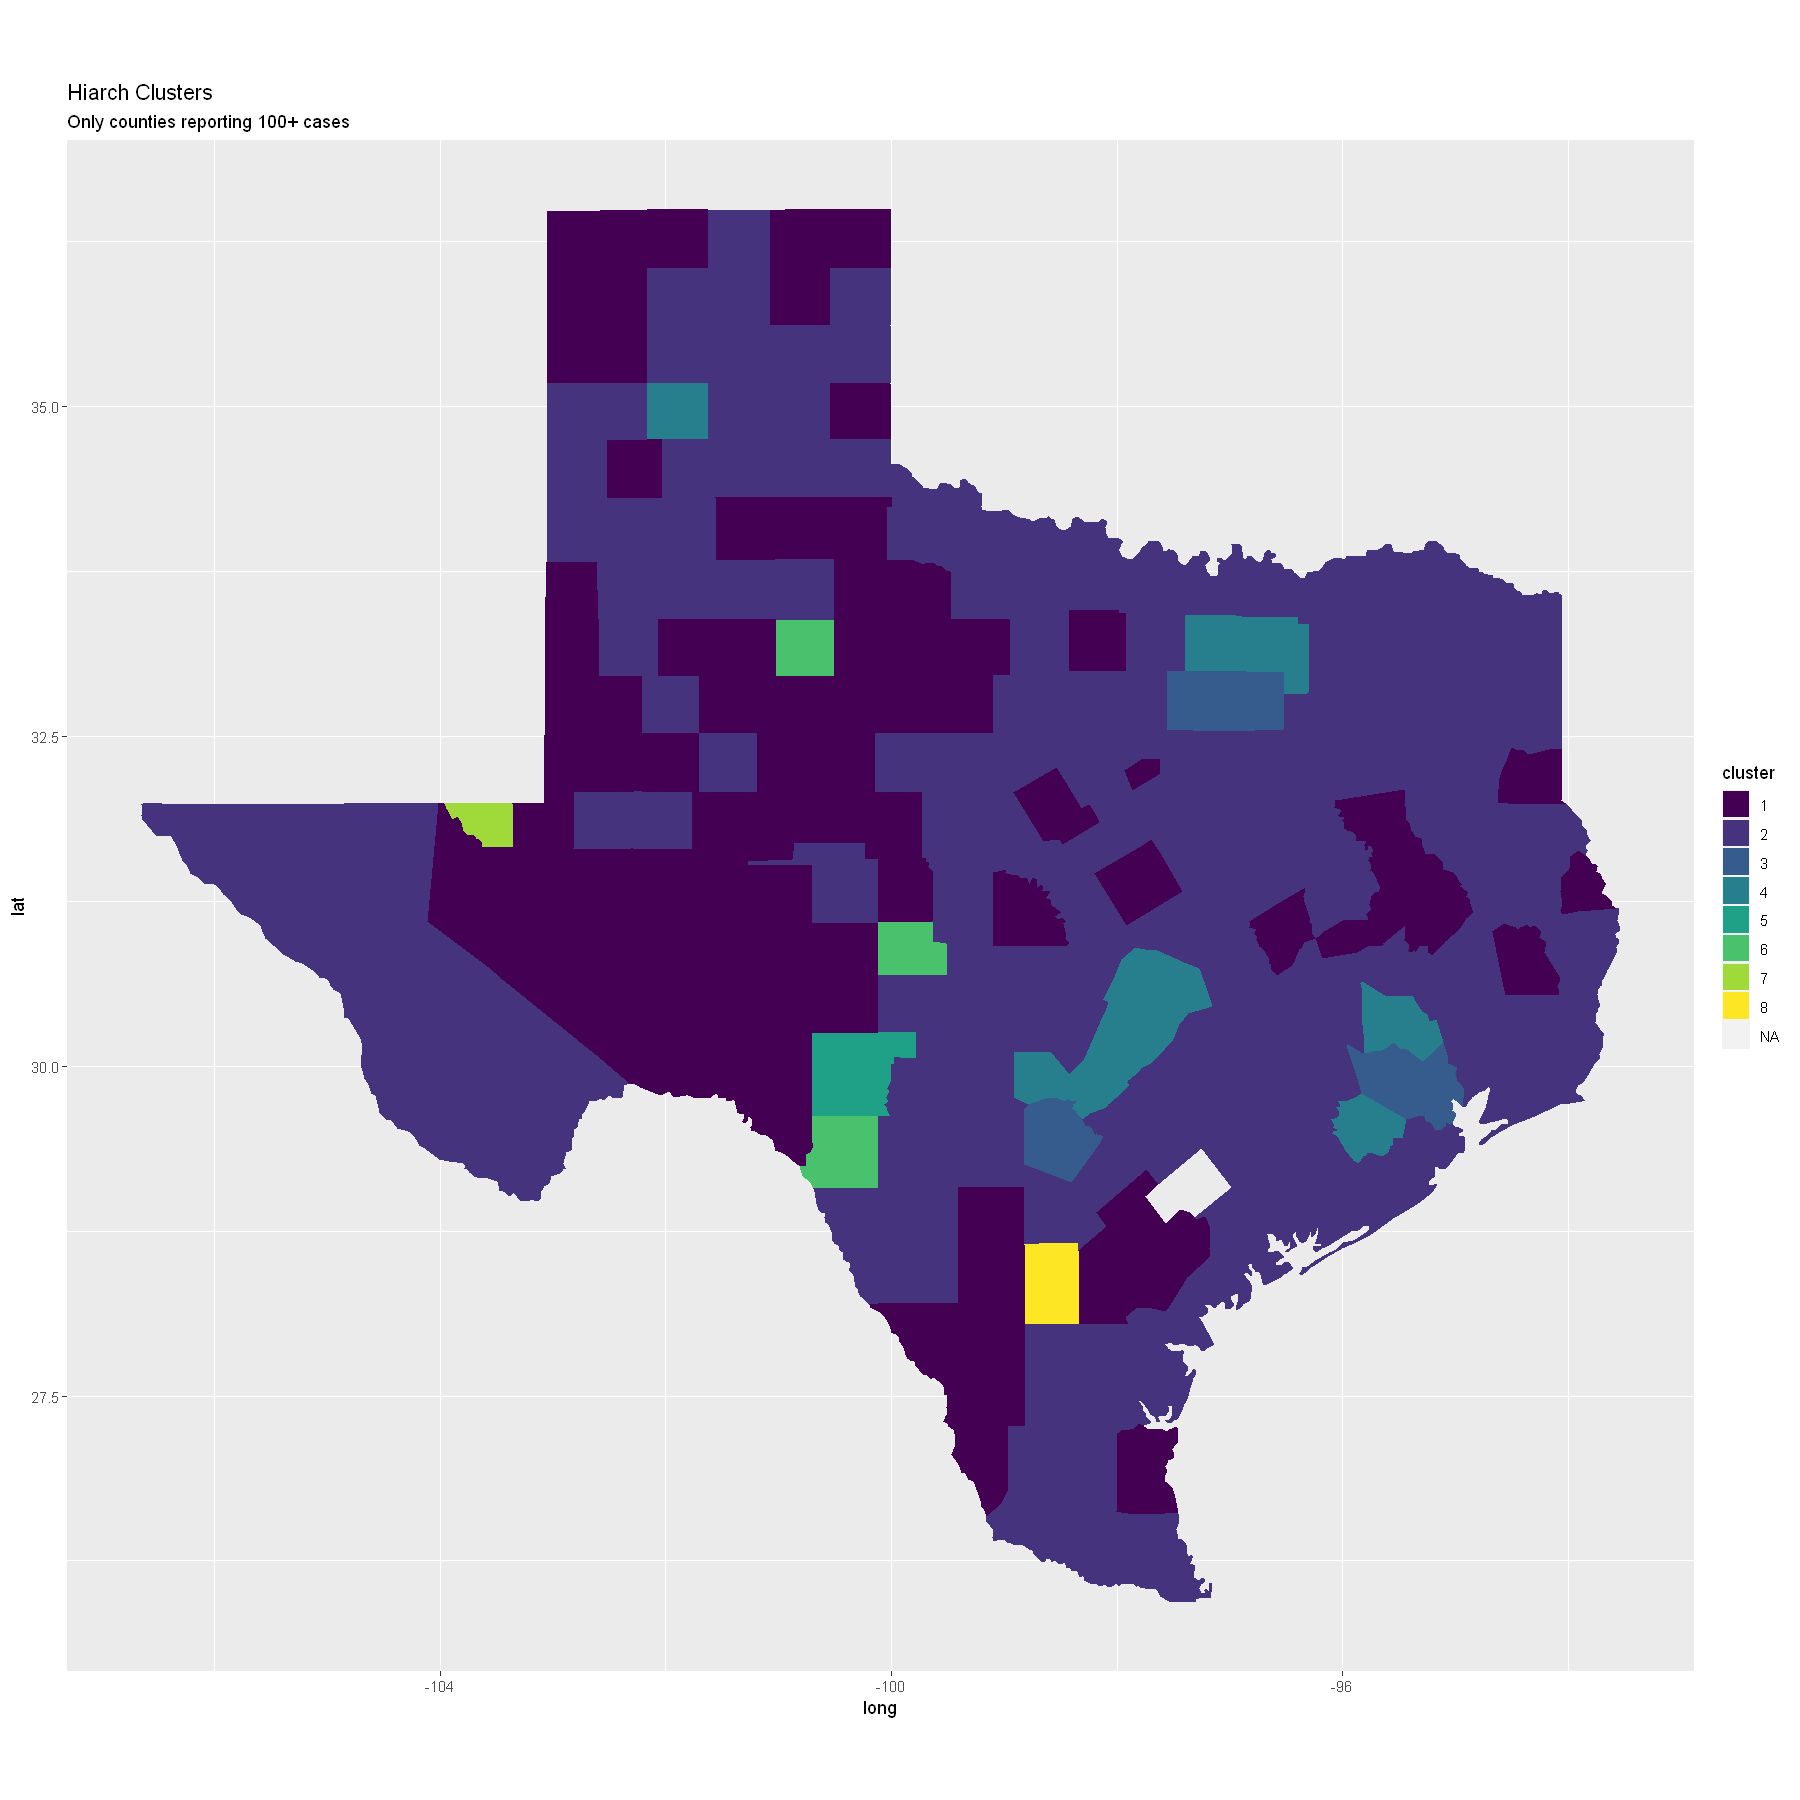

In [193]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_hclust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Hiarch Clusters", subtitle = "Only counties reporting 100+ cases")

In [194]:
se_data_hc <- se_data %>% add_column(cluster = se_data_hclust$cluster)

se_data_hc %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,80.28430,2.1165843,0.02792868
2,77.41894,1.8437117,0.02474199
3,83.55739,0.9477385,0.01160231
4,68.08102,0.8240221,0.01250070
5,98.05779,1.4211274,0.01449275
6,85.28016,1.5506549,0.01803719
7,13.51351,0.0000000,0.00000000
8,116.66667,3.3333333,0.02857143


#### Obervations

> Very low average cases per 1000 in cluster 7

> High deaths and cases for 8

> High cases for 5

In [14]:
library(cluster)
library(ggplot2)

# Read in the data
df <- emp_data

# Select the columns to use for clustering
vars <-names(df)
# Remove any rows with missing data
df <- na.omit(df[, c(vars)])

# Perform fuzzy clustering with 2 clusters
set.seed(123) # for reproducibility
clusters <- fanny(df[, vars], k = 4, memb.exp = 1.5)

# Add the cluster assignments to the original data frame
df$cluster <- clusters$membership



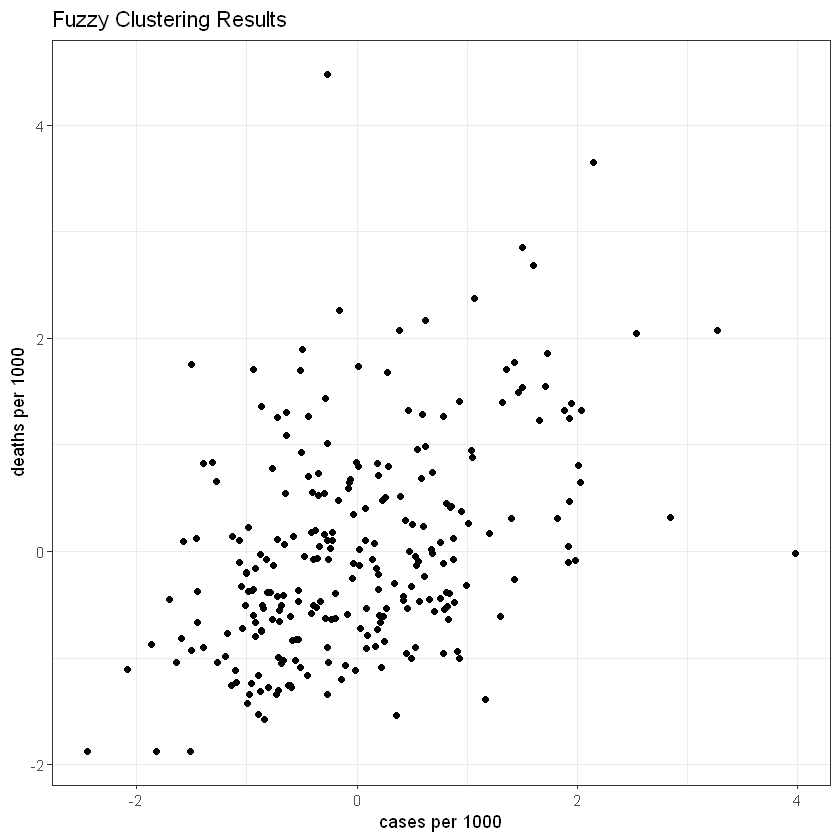

In [15]:

# Create a scatter plot of confirmed cases vs. median income, colored by cluster
ggplot(df, aes(x = cases_per_1000, y = deaths_per_1000)) + 
  geom_point() +
  labs(title = "Fuzzy Clustering Results", x = "cases per 1000", y = "deaths per 1000") +
  theme_bw()

In [16]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% 
  rename(c(county = subregion))

In [17]:
df <- df %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_clust <- counties_TX %>% left_join(df)

Joining, by = "county"


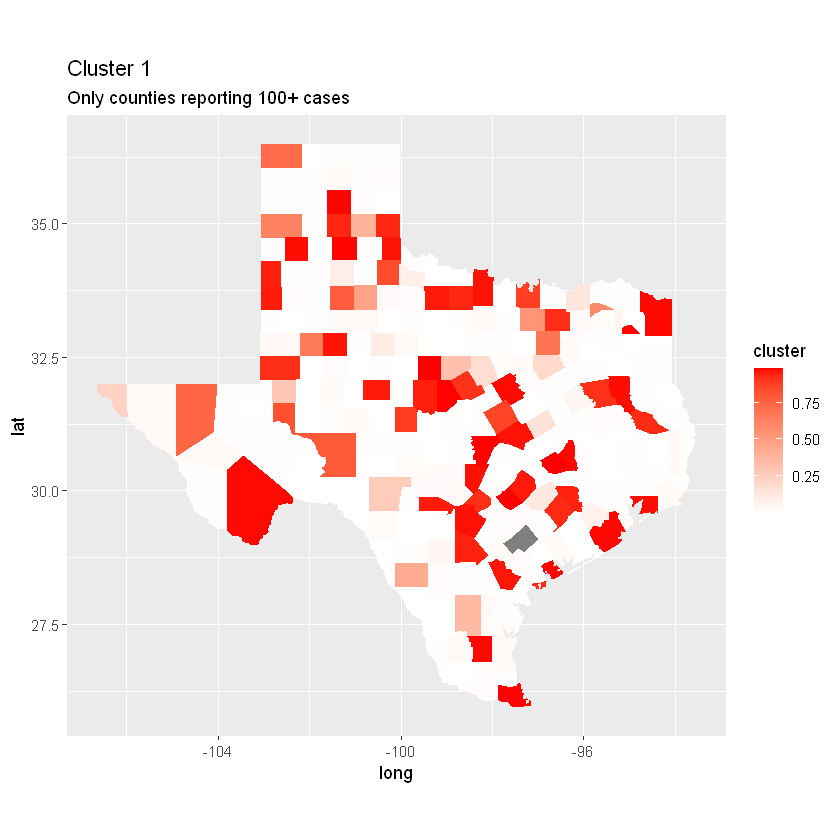

In [18]:
counties_TX_clust_1 <- counties_TX_clust %>% mutate(cluster = cluster[,1])
ggplot(counties_TX_clust_1, aes(long, lat)) + 
  geom_polygon(data = counties_TX_clust_1, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Cluster 1", subtitle = "Only counties reporting 100+ cases")

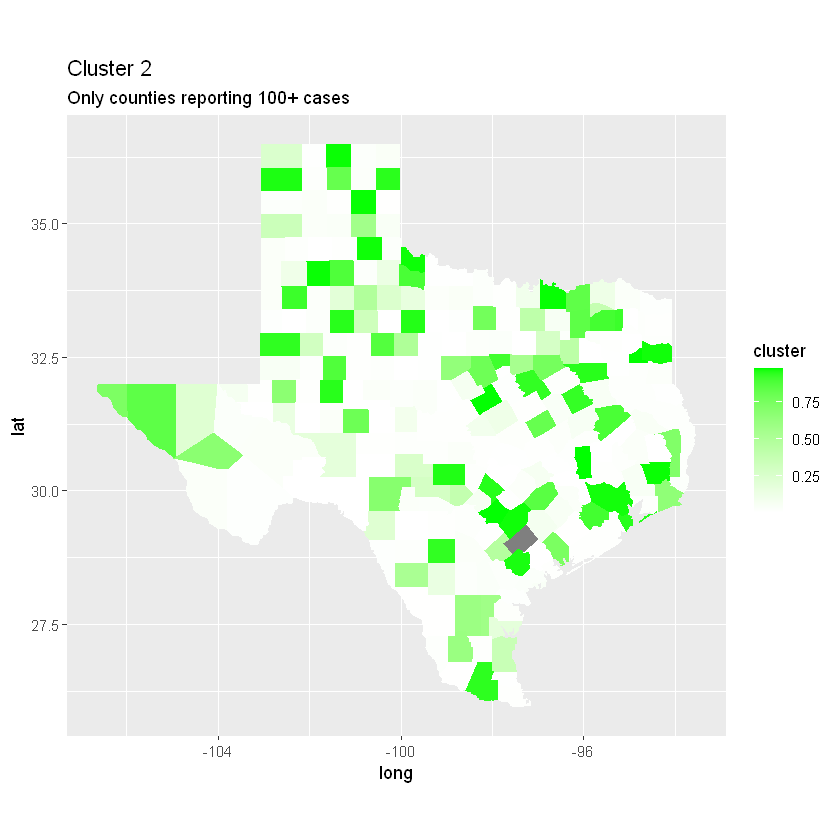

In [19]:
counties_TX_clust_2 <- counties_TX_clust %>% mutate(cluster = cluster[,2])
ggplot(counties_TX_clust_2, aes(long, lat)) + 
  geom_polygon(data = counties_TX_clust_2, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "green") +
  labs(title = "Cluster 2", subtitle = "Only counties reporting 100+ cases")

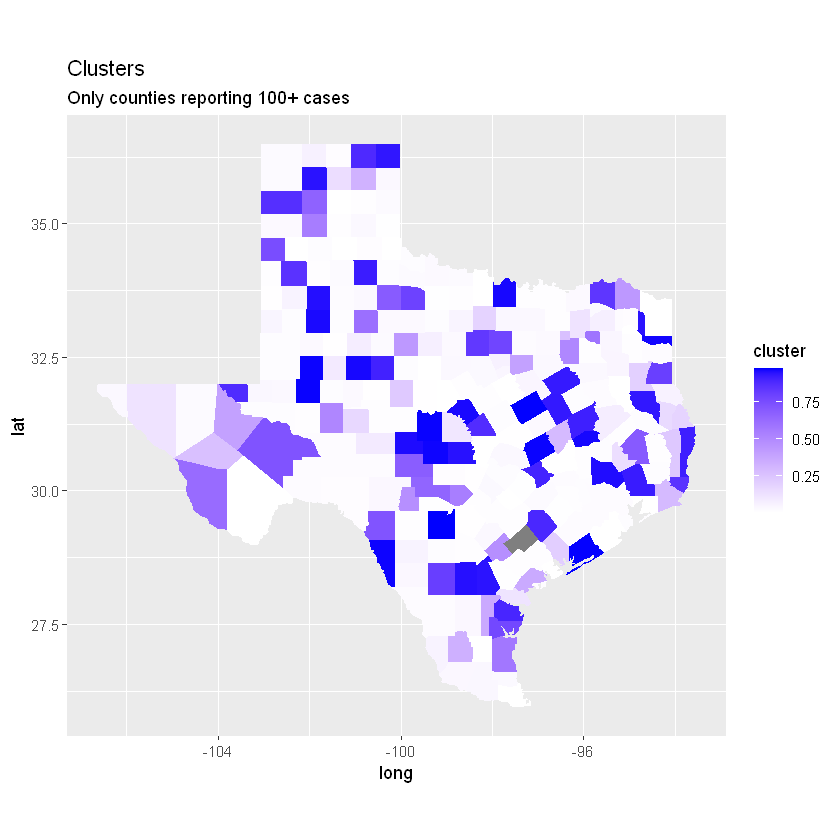

In [20]:
counties_TX_clust_3 <- counties_TX_clust %>% mutate(cluster = cluster[,3])
ggplot(counties_TX_clust_3, aes(long, lat)) + 
  geom_polygon(data = counties_TX_clust_3, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

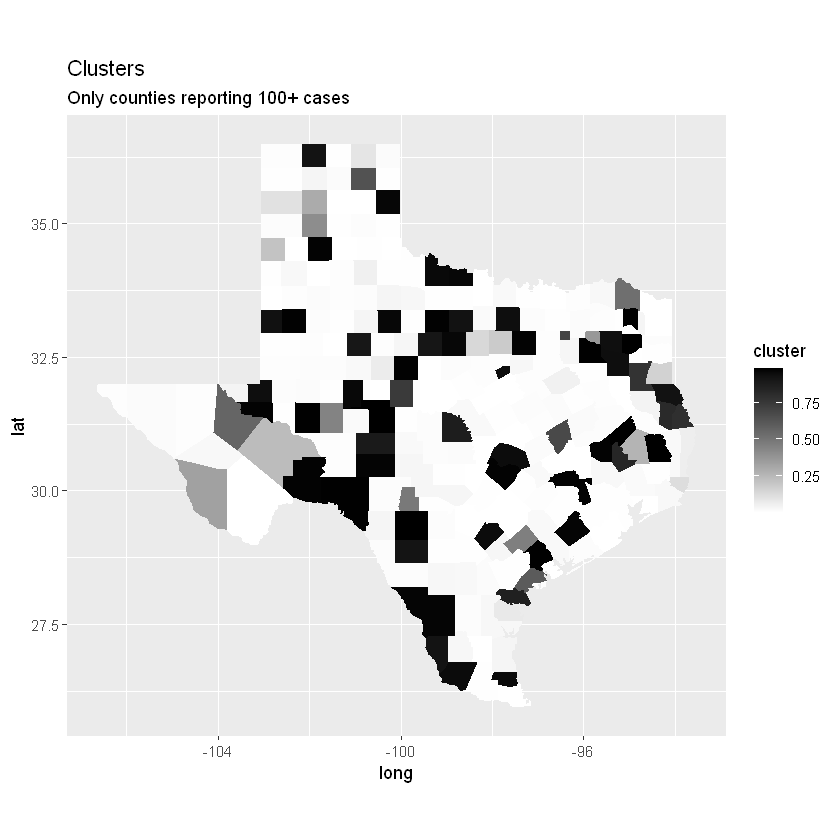

In [21]:
counties_TX_clust_4 <- counties_TX_clust %>% mutate(cluster = cluster[,4])
ggplot(counties_TX_clust_4, aes(long, lat)) + 
  geom_polygon(data = counties_TX_clust_4, aes(x = long, y = lat, group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_gradient(low = "white", high = "black") +
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

# Demographic Indicators Dataset

## K - means Clustering

In [313]:
demo_data_prepped <- demo_data[, !(colnames(demo_data) %in% c("county_name.x", "cases_per_1000", "deaths_per_1000", "death_per_case"))]


In [314]:
set.seed(123)
km <- kmeans(demo_data_prepped, centers = 4)
km

K-means clustering with 4 clusters of sizes 25, 156, 65, 8

Cluster means:
  hispanic_ratio median_age bachelors_degree percent_male_pop
1      0.3281032 -0.3317643       -0.2331040       2.47811495
2     -0.5814554  0.4426726       -0.1428715      -0.33700305
3      1.2786539 -0.8382277       -0.1584626      -0.08741399
4     -0.0760051 -0.7847512        4.8019532      -0.46231102
  percent_female_pop white_ratio black_ratio asian_ratio amerindian_ratio
1        -2.47811495  -0.3927378   0.1823698  -0.2080104       -0.1576406
2         0.33700305   0.5836886   0.1650225  -0.1206576        0.1334509
3         0.08741399  -1.1689078  -0.6069608  -0.1027448       -0.2316490
4         0.46231102  -0.6572459   1.1437113   3.8376579       -0.2275169
  other_race_ratio percent_children
1       0.09385046       -0.7758344
2       0.04156364       -0.3504943
3      -0.19328195        1.0814699
4       0.46664217        0.4721784

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  

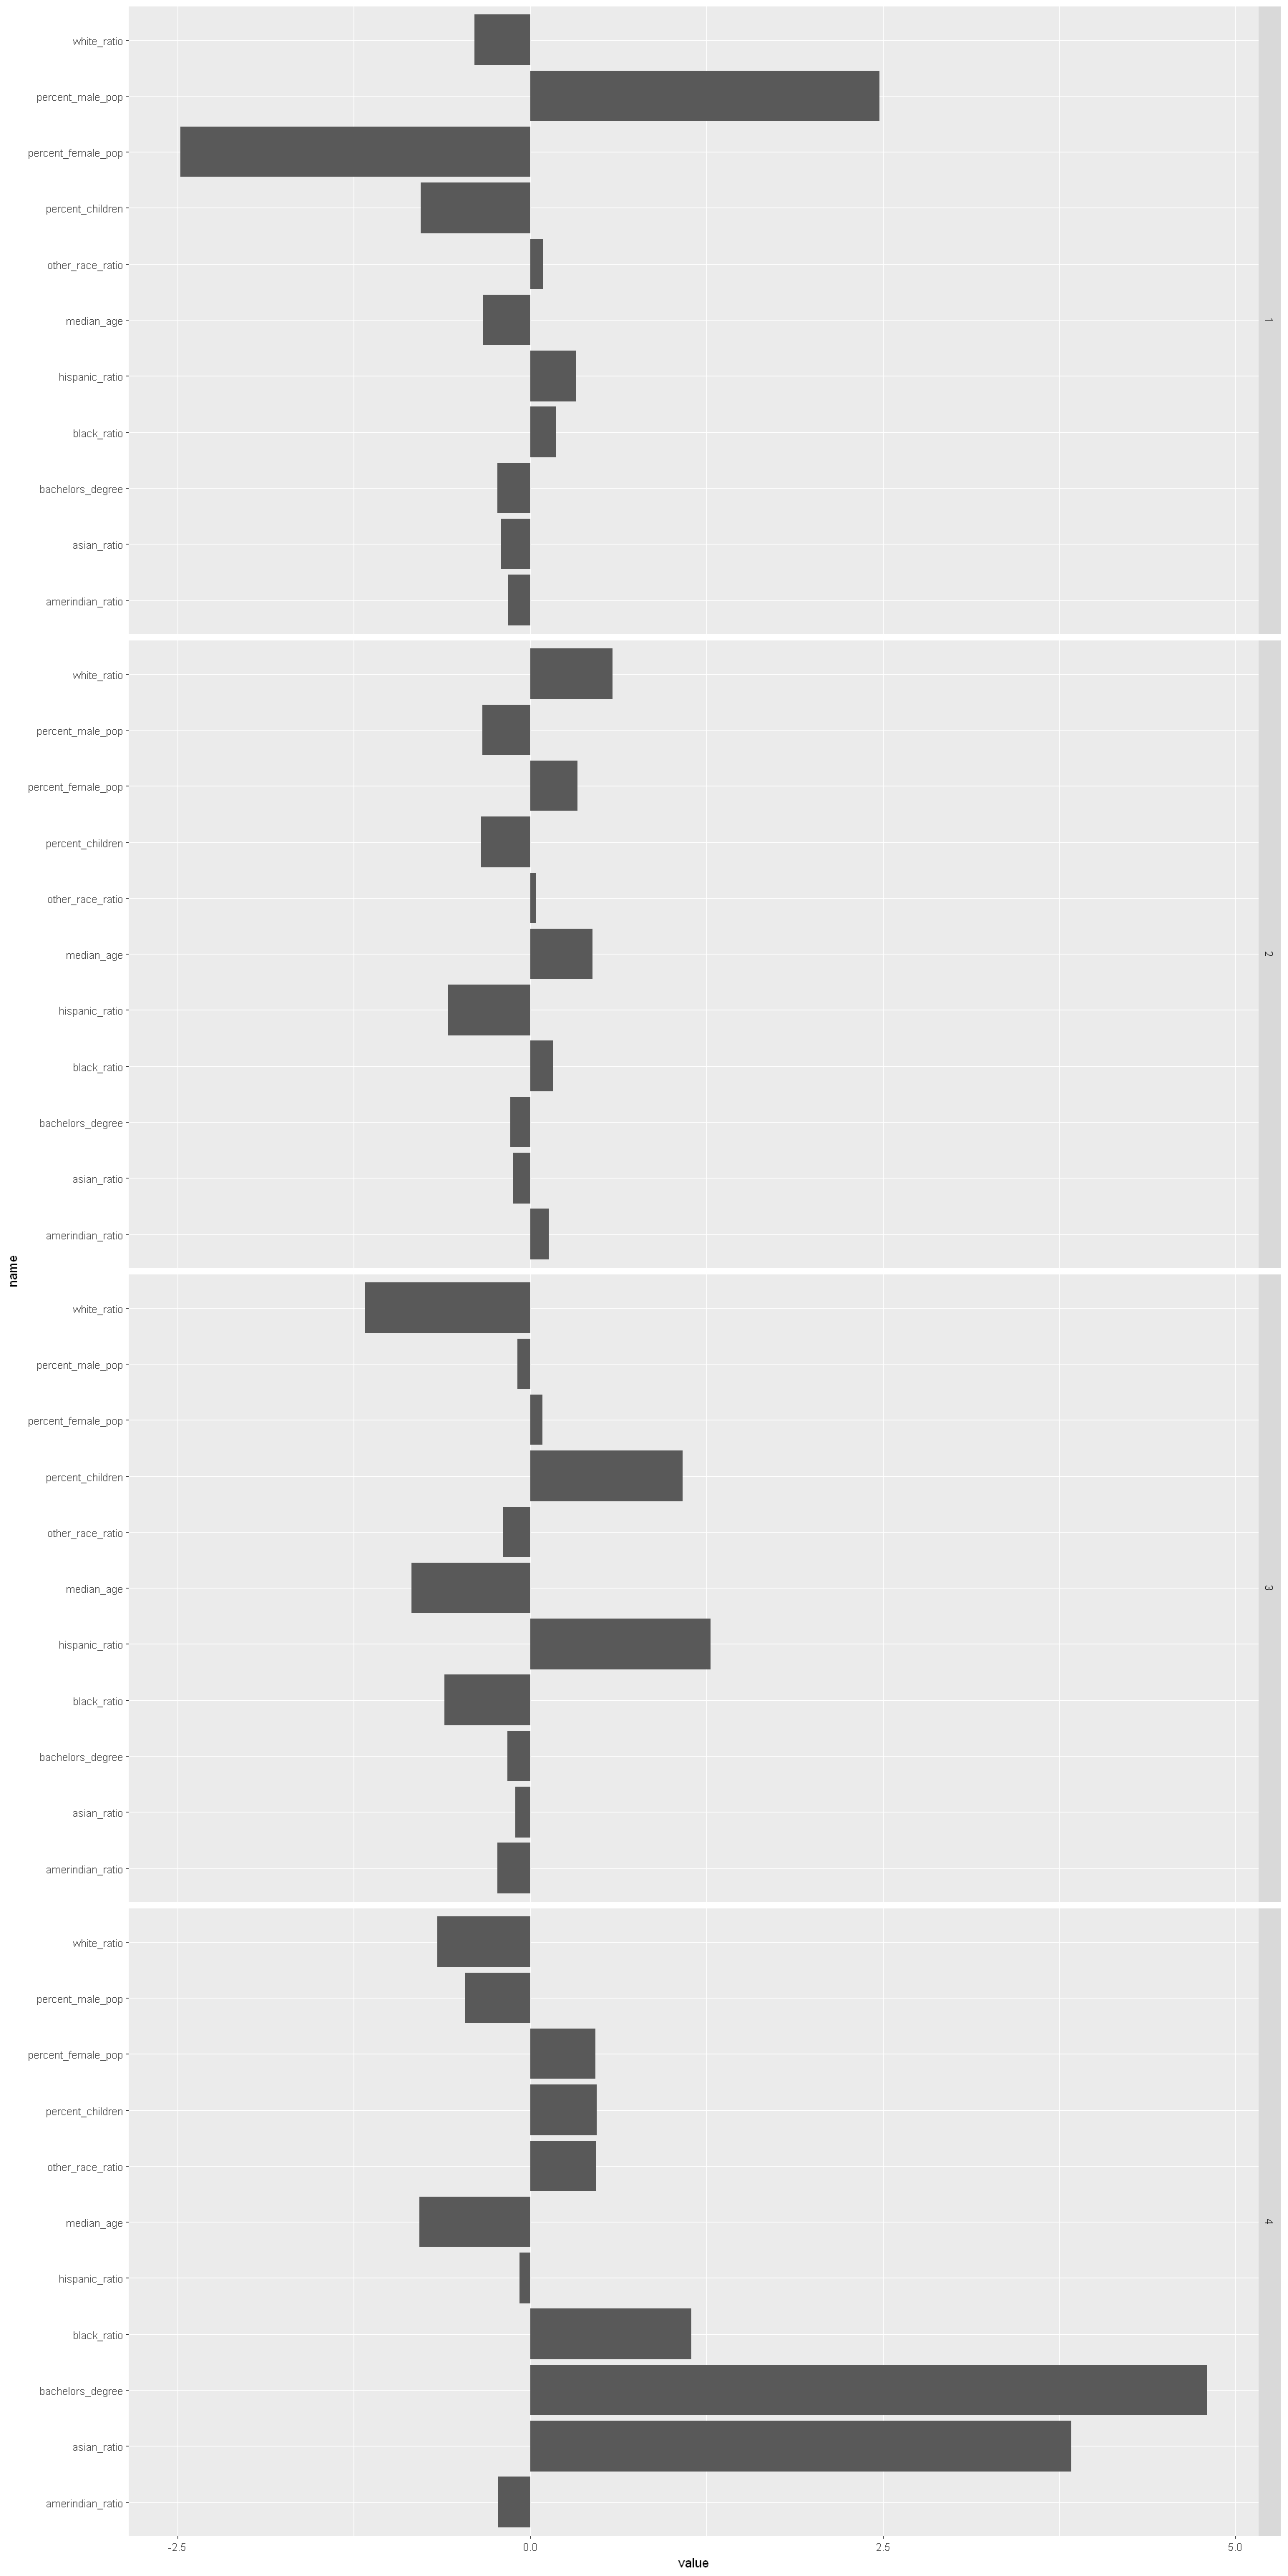

In [315]:
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(pivot_longer(as_tibble(km$centers,  rownames = "cluster"), 
  cols = colnames(km$centers)), 
  aes(y = name, x = value)) +
  geom_bar(stat = "identity") +
  facet_grid(rows = vars(cluster))

In [316]:
demo_data <- demo_data %>% mutate(county = county_name.x %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_TX_clust <- counties_TX %>% left_join(demo_data %>% 
    add_column(cluster = factor(km$cluster)))

Joining, by = "county"


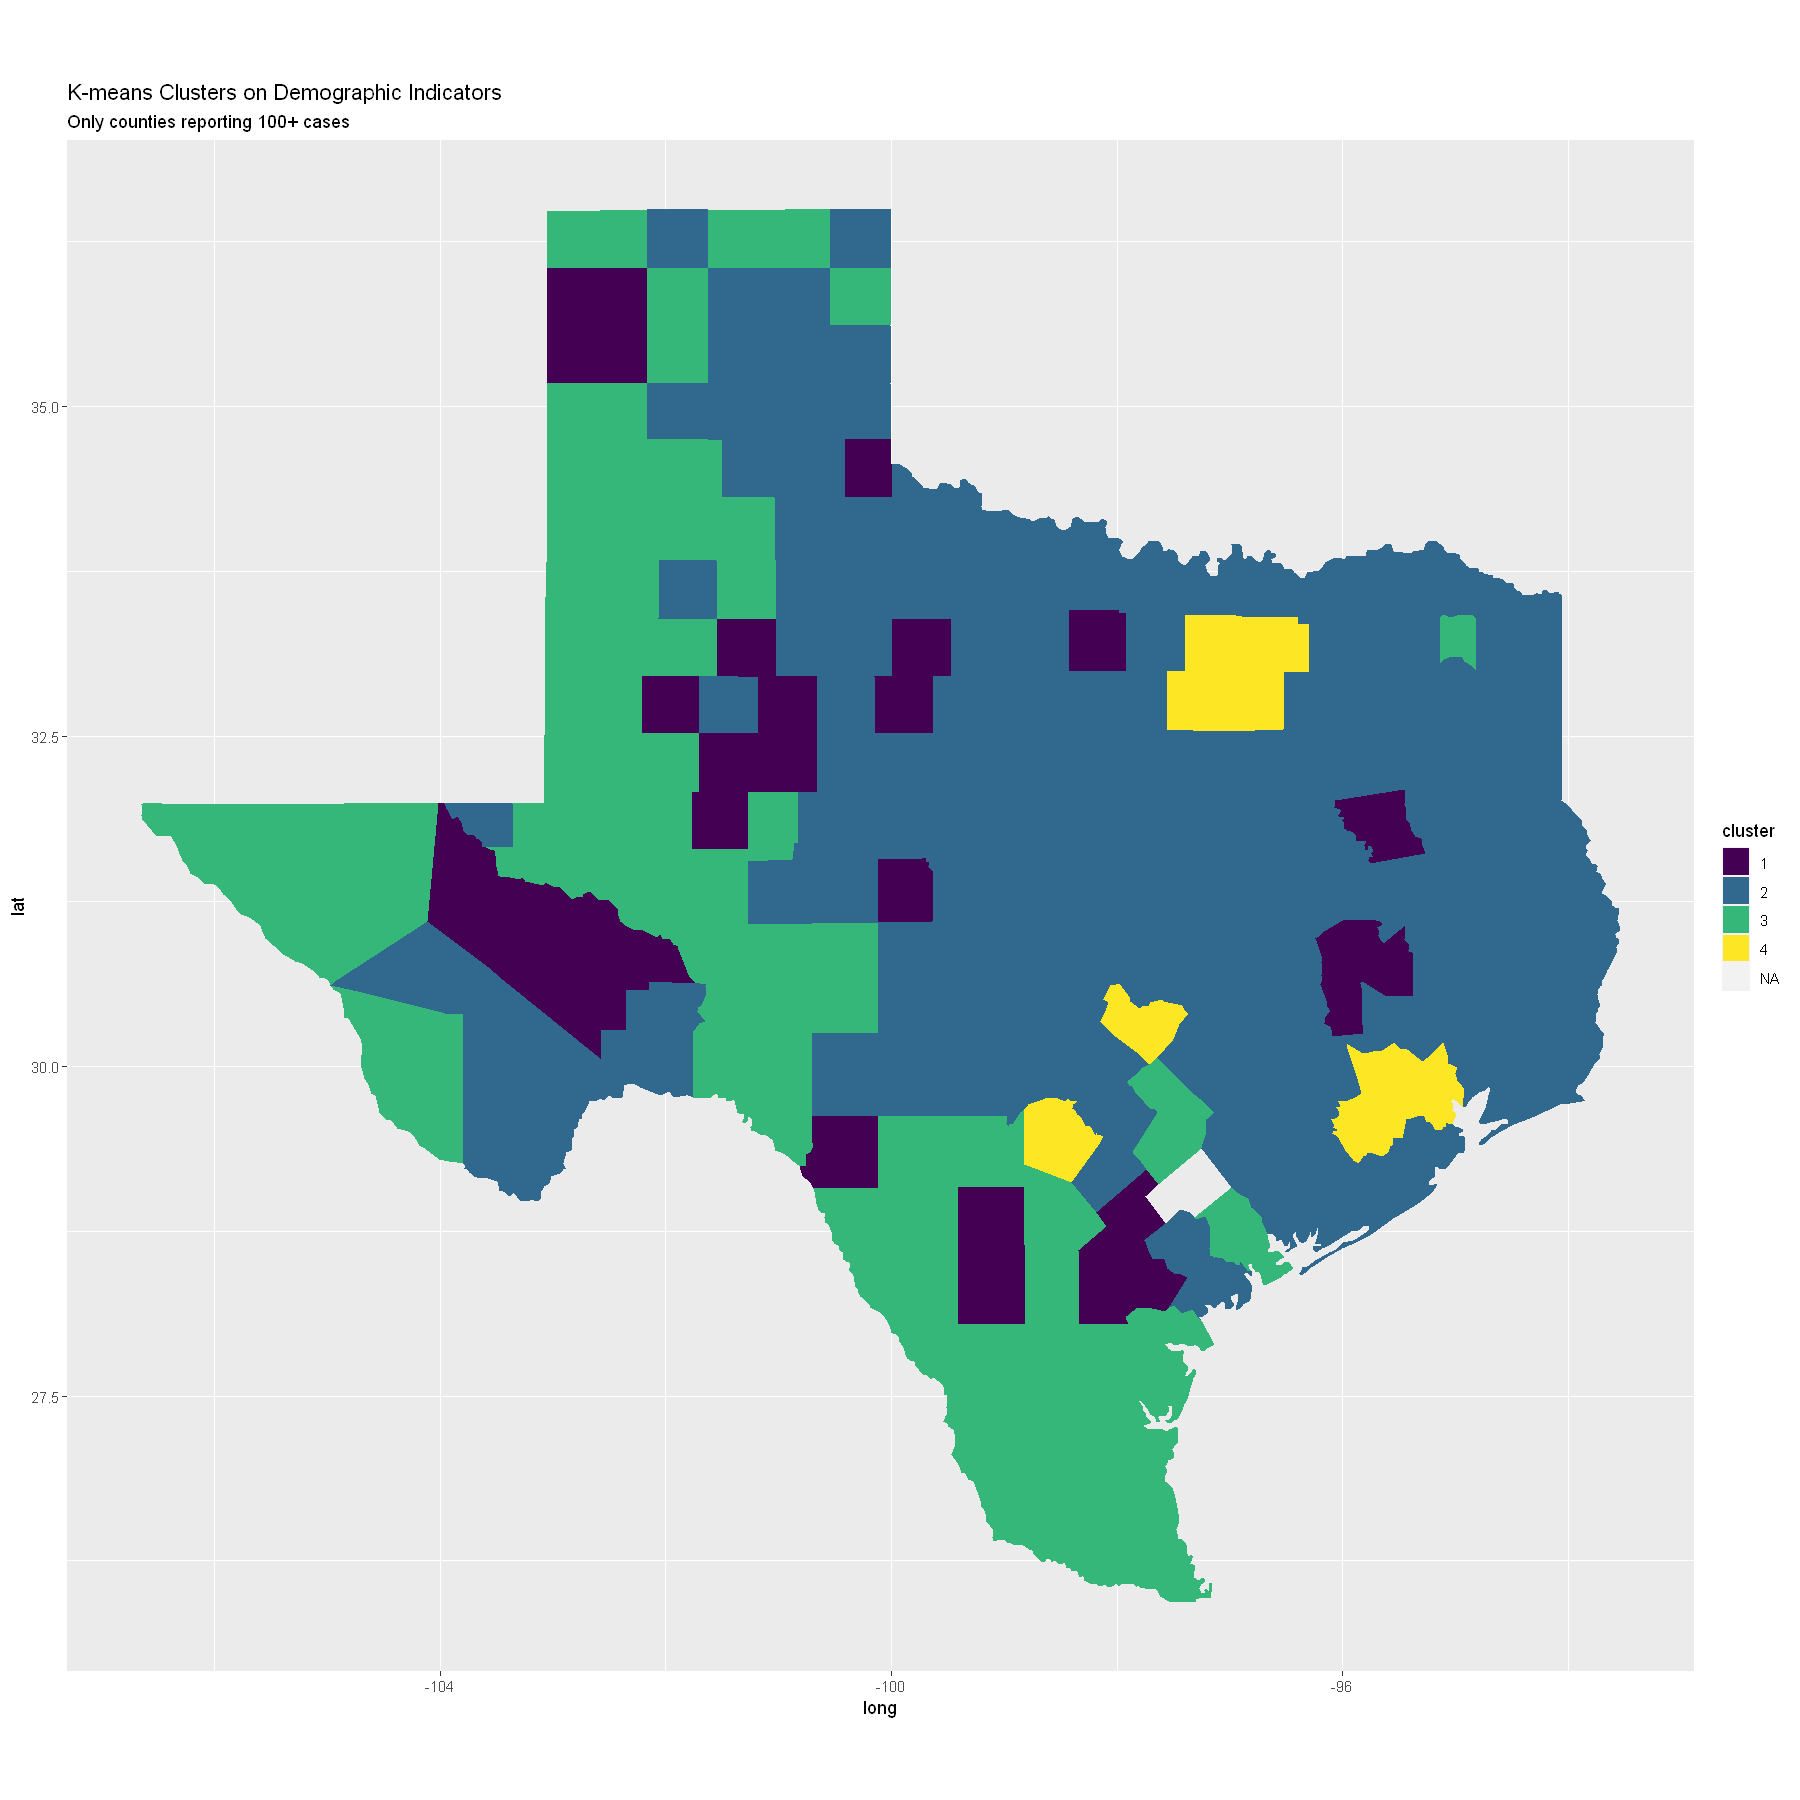

In [319]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(counties_TX_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "K-means Clusters on Demographic Indicators", subtitle = "Only counties reporting 100+ cases")

In [321]:
demo_data_km <- demo_data %>% add_column(cluster = factor(km$cluster))

demo_data_km %>% group_by(cluster) %>% summarize(
  avg_cases = mean(cases_per_1000), 
  avg_deaths = mean(deaths_per_1000),
avg_deaths_per_case = mean(death_per_case))

cluster,avg_cases,avg_deaths,avg_deaths_per_case
<fct>,<dbl>,<dbl>,<dbl>
1,90.35203,1.7592425,0.02110167
2,68.97909,1.6776889,0.02527045
3,95.55802,2.4536850,0.02644606
4,72.30528,0.7537937,0.01043821
